# IP Adapters
paper link: https://arxiv.org/pdf/2308.06721

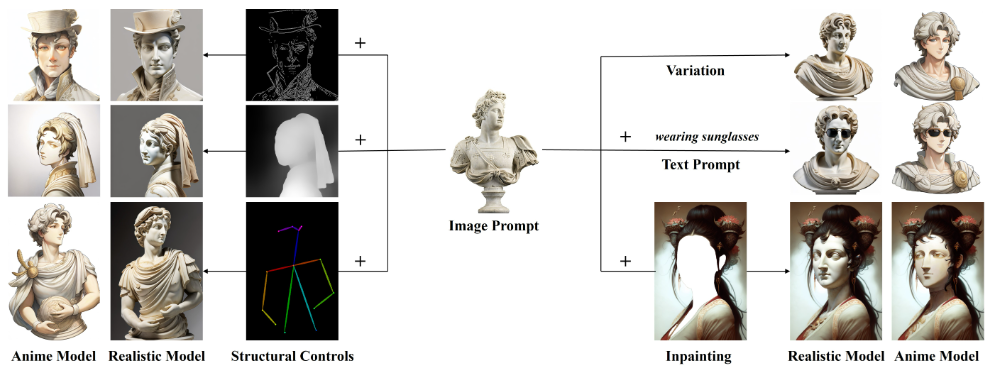


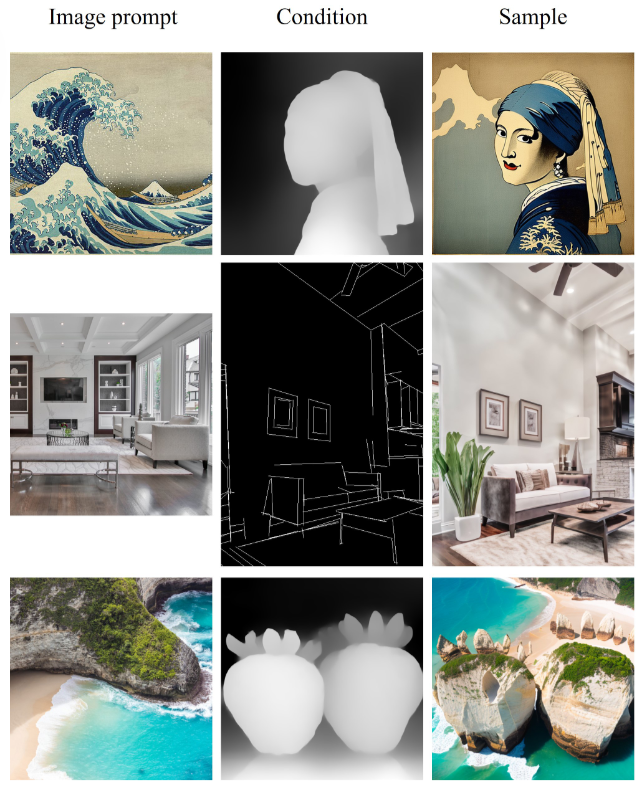


IP-Adapter is a lightweight module that enables pretrained text-to-image diffusion models to incorporate image prompts by adding a decoupled cross-attention mechanism that processes text and image features separately.


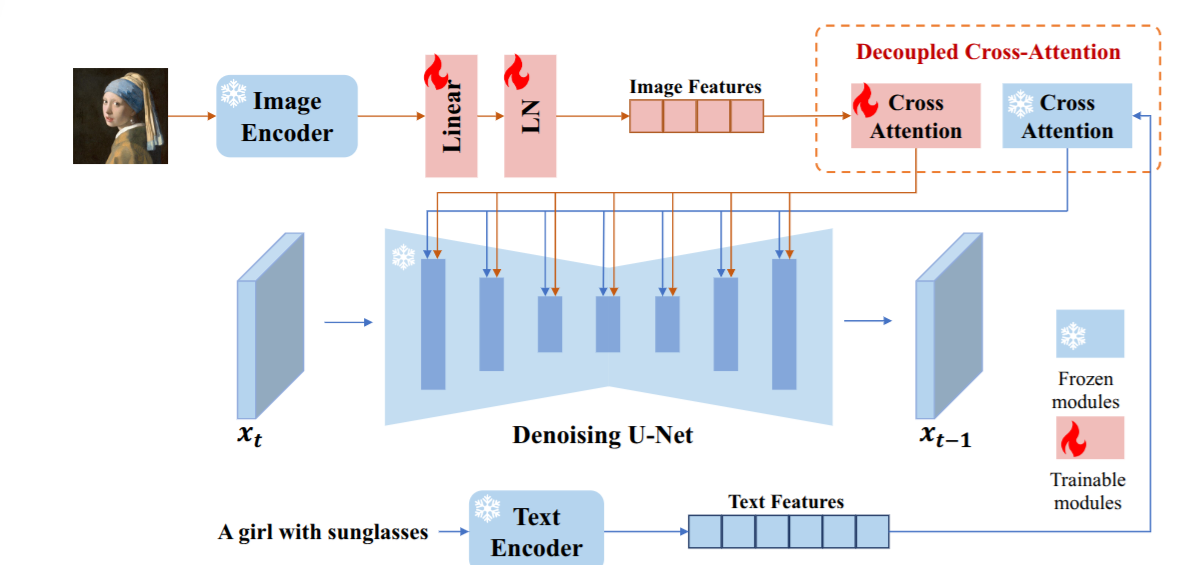

In [2]:
import numpy as np
import torch
from pathlib import Path
from diffusers.utils import load_image
from PIL import Image
from tqdm.auto import tqdm
from torchvision import transforms
import matplotlib.pyplot as plt
from IPython.display import clear_output
from diffusers import StableDiffusionPipeline,DPMSolverMultistepScheduler,DDIMScheduler

device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [3]:
model_id = 'stable-diffusion-v1-5/stable-diffusion-v1-5'

pipeline = StableDiffusionPipeline.from_pretrained(model_id, 
                                                   safety_checker=None, 
                                                   torch_dtype=torch.float16, 
                                                   device_map=device)
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config, algorithm_type="sde-dpmsolver++")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


# Load IP adapter

In [4]:
pipeline.load_ip_adapter(
  "h94/IP-Adapter",
  subfolder='models', 
  weight_name="ip-adapter-full-face_sd15.bin"
)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

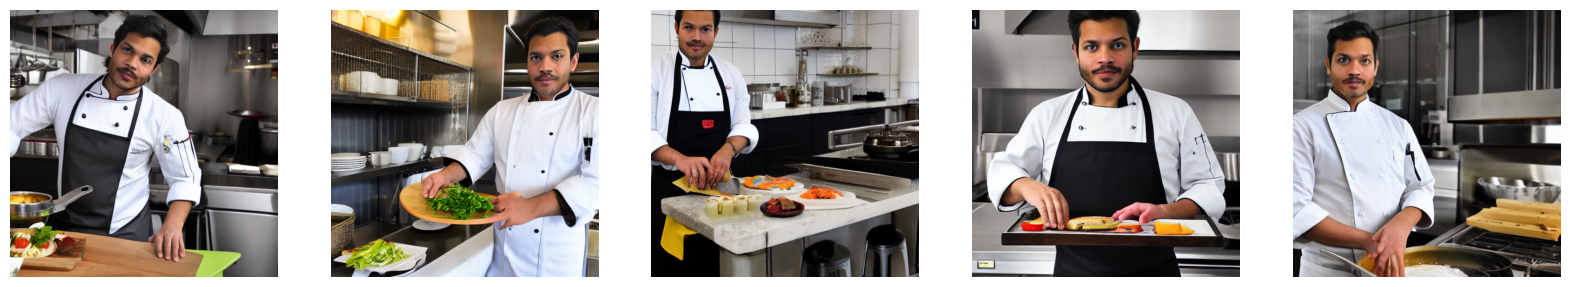

In [5]:
pipeline.set_ip_adapter_scale(0.4)
image = load_image("mohan_face.jpg")
gen_images=[]

for _ in range(5):
    gen_image =     pipeline(
            prompt="A photo of  a chef, wearing an apron, cooking in a French restaurant",
            ip_adapter_image=image,
            negative_prompt="lowres, bad anatomy, worst quality, low quality",
            num_inference_steps=30,
            height=512,
            width=512,
        ).images[0]

    gen_images.append(gen_image)

fig,axes = plt.subplots(1,5,figsize=(20,20))
for i,ax in enumerate(axes):
    ax.imshow(gen_images[i])
    ax.axis('off')
plt.show()

# Apply different scale to the IP adapter

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

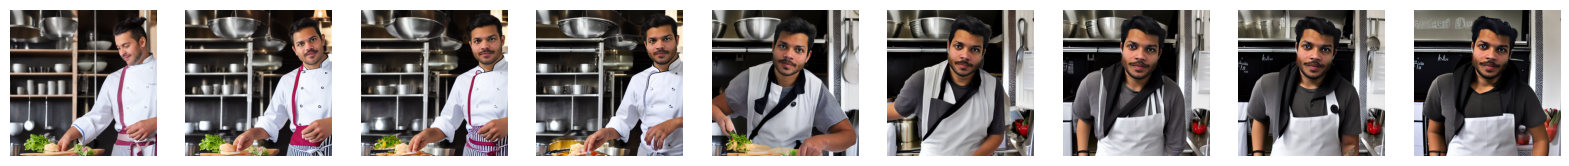

In [6]:

image = load_image("mohan_face.jpg")
gen_images=[]

for ip_scale in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    pipeline.set_ip_adapter_scale(ip_scale)
    gen_image =     pipeline(
            prompt="A photo of  a chef, wearing an apron, cooking in a French restaurant",
            ip_adapter_image=image,
            negative_prompt="lowres, bad anatomy, worst quality, low quality",
            num_inference_steps=30,
            height=512,
            width=512,
            generator=torch.manual_seed(0)
        ).images[0]

    gen_images.append(gen_image)

fig,axes = plt.subplots(1,9,figsize=(20,20))
for i,ax in enumerate(axes):
    ax.imshow(gen_images[i])
    ax.axis('off')
plt.show()

# Effect of different prompts

In [7]:
prompts = [
    # 1. Cinematic Portrait
    "a cinematic portrait of a person standing outdoors, dramatic lighting, shallow depth of field, warm tones, film grain, detailed skin texture, high contrast, professional movie still",

    # 2. Hyper-Realistic Magazine Photography
    "a hyper realistic photo of a person posing for a high fashion editorial, soft natural diffuse lighting, crisp details, clean background, Vogue style professional photography, ultra sharp",

    # 3. Watercolor Illustration
    "a watercolor illustration of a person in a serene environment, soft pastel colors, gentle brush strokes, handmade texture, artistic lighting, whimsical atmosphere, painterly style",

    # 4. Cyberpunk Neon Style
    "a cyberpunk portrait of a person in a futuristic neon city, glowing reflections, deep shadows, chrome accents, high tech ambience, vibrant color palette, immersive sci-fi atmosphere",

    # 5. Impressionist Oil Painting
    "an impressionist oil painting of a person in a peaceful outdoor setting, thick expressive brush strokes, warm natural lighting, vibrant color blending, rich textures, Monet inspired style"
]


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

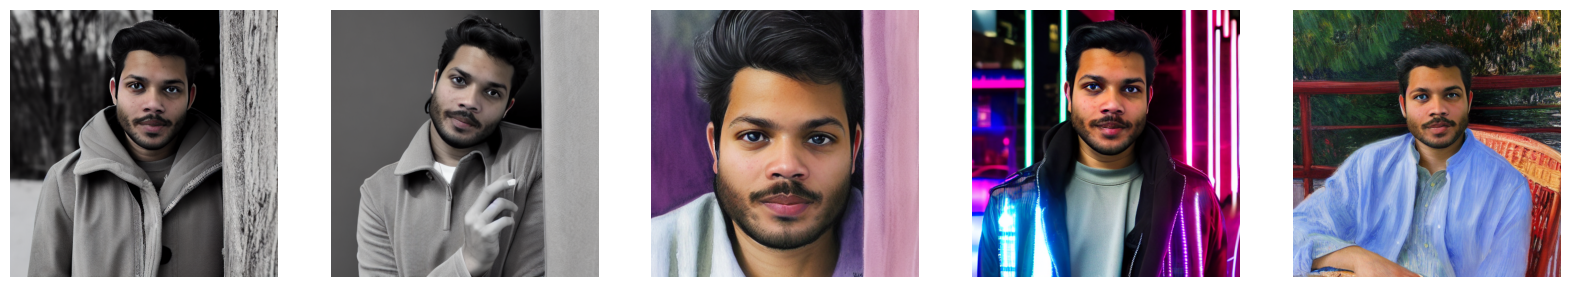

In [8]:
gen_images=[]

for prompt in prompts:
    pipeline.set_ip_adapter_scale(0.5)
    gen_image =     pipeline(
            prompt=prompt,
            ip_adapter_image=image,
            negative_prompt="lowres, bad anatomy, worst quality, low quality, washed out colors, flat lighting, distorted features, artifacts, extra limbs",
            num_inference_steps=30,
            height=512,
            width=512,
            generator=torch.manual_seed(0)
        ).images[0]

    gen_images.append(gen_image)

fig,axes = plt.subplots(1,5,figsize=(20,20))
for i,ax in enumerate(axes):
    ax.imshow(gen_images[i])
    ax.axis('off')
plt.show()